# MNIST

This example takes from the official Pytorch tutorial on an [FGSM Adversal Attack](https://pytorch.org/tutorials/beginner/fgsm_tutorial.html) which was instrumental for us to figure out how to build the `dropviz` package.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

import dropviz

In [2]:
# LeNet Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [3]:
pretrained_model = "lenet_mnist_model.pth"
use_cuda=True

# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Initialize the network
model = Net().to(device)

# Load the pretrained model
model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))

CUDA Available:  True


<All keys matched successfully>

In [4]:
# MNIST Test dataset and dataloader declaration
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data/mnist/', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=1, shuffle=True)

# make the data loader iterable so we can call next()
data_iter = iter(test_loader)

Epoch 1, loss 11.517226219177246
Epoch 1001, loss 5.165225982666016
Epoch 2001, loss 3.5261623859405518
Epoch 3001, loss 2.8060147762298584
Epoch 4001, loss 2.1478233337402344
Epoch 5001, loss 1.5663256645202637
Epoch 6001, loss 1.13865327835083
Epoch 7001, loss 0.8481220602989197
Epoch 8001, loss 0.6459513306617737
Epoch 9001, loss 0.48675116896629333
Final loss 0.3711188733577728


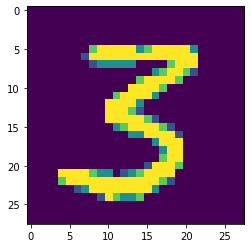

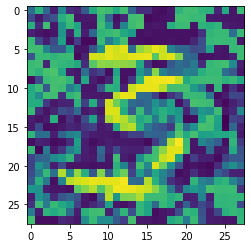

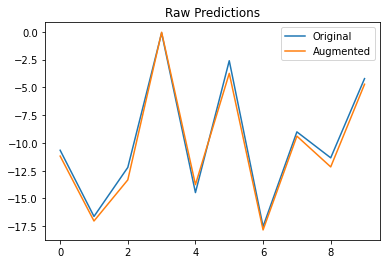

Epoch 1, loss 0.30873438715934753
Epoch 1001, loss 0.049368008971214294
Epoch 2001, loss 0.02240319363772869
Epoch 3001, loss 0.020383084192872047
Epoch 4001, loss 0.015566922724246979
Epoch 5001, loss 0.010932880453765392
Final loss 0.009999915957450867


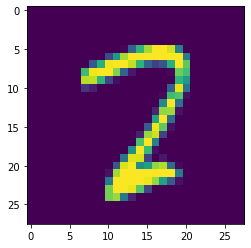

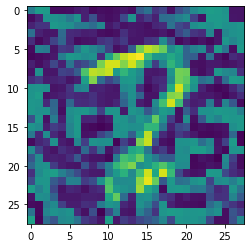

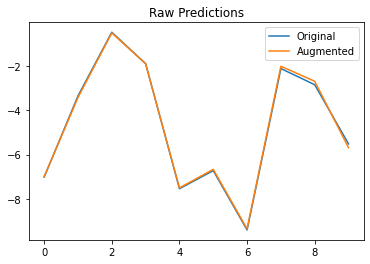

Epoch 1, loss 0.35970354080200195
Epoch 1001, loss 0.049782656133174896
Epoch 2001, loss 0.020029399544000626
Epoch 3001, loss 0.013652302324771881
Final loss 0.009997966699302197


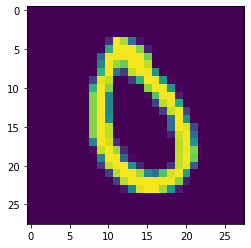

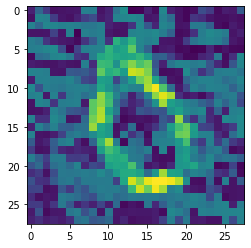

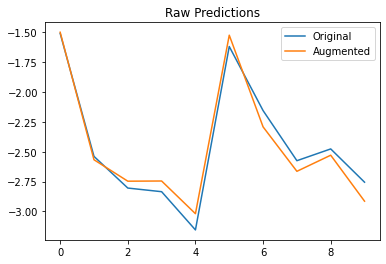

Epoch 1, loss 0.49771878123283386
Epoch 1001, loss 0.048811979591846466
Epoch 2001, loss 0.02051576040685177
Epoch 3001, loss 0.010926267132163048
Final loss 0.009997867047786713


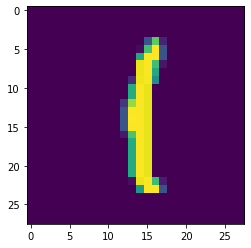

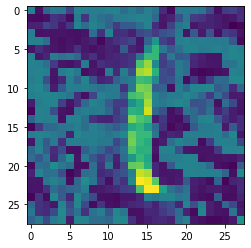

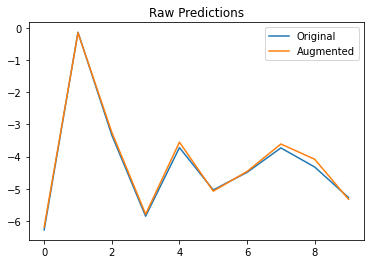

Epoch 1, loss 0.9426907896995544
Epoch 1001, loss 0.134980246424675
Epoch 2001, loss 0.1180868074297905
Epoch 3001, loss 0.09447035938501358
Epoch 4001, loss 0.08552613109350204
Epoch 5001, loss 0.081725113093853
Epoch 6001, loss 0.07883347570896149
Epoch 7001, loss 0.07948782294988632
Epoch 8001, loss 0.0792013630270958
Epoch 9001, loss 0.0769074559211731
Final loss 0.07405080646276474


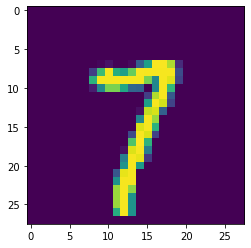

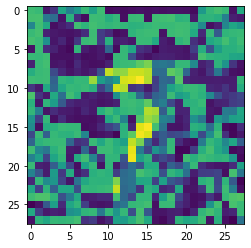

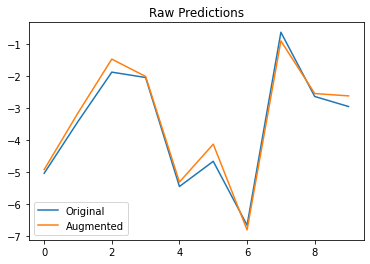

In [5]:
N = 5

for _ in range(N):

    data, target = next(data_iter)

    corrupted_image, output = dropviz.augment(model, model.fc2, device, data, 10000, 0.01, 0.0001)

    plt.figure()
    plt.imshow(data.reshape(28, 28))
    plt.figure()
    plt.imshow(corrupted_image)

    plt.figure()
    for o, l in zip(output, ['Original', 'Augmented']):
        plt.plot(o, label=l)
    plt.legend()
    plt.title('Raw Predictions')
    plt.show()